# Support Vector Machines

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x,y =make_blobs(n_samples = 100,n_features =2,centers =2,cluster_std =2,random_state =1)

In [3]:
x.shape

(100, 2)

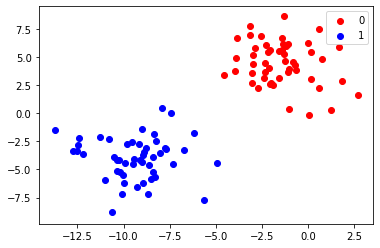

In [4]:
plt.scatter(x[y==0,0],x[y==0,1],c='red',label ='0')
plt.scatter(x[y==1,0],x[y==1,1],c='blue',label ='1')
plt.legend()
plt.show()

In [5]:
#adding an outlier

In [6]:
t1 = [[-2.5,-7.5]]

In [7]:
x1 = np.append(x,t1,axis=0)


In [8]:
x1.shape

(101, 2)

In [9]:
y1 = np.append(y,0)

In [10]:
y1.shape

(101,)

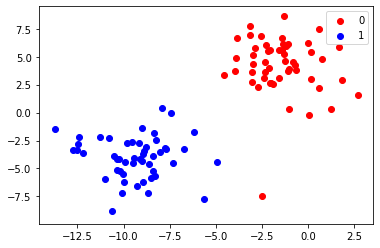

In [11]:
plt.scatter(x1[y1==0,0],x1[y1==0,1],c='red',label ='0')
plt.scatter(x1[y1==1,0],x1[y1==1,1],c='blue',label ='1')
plt.legend()
plt.show()

In [12]:
from sklearn.svm import SVC

In [13]:
clf = SVC(kernel ='linear',C=1)

In [14]:
clf.fit(x1,y1)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
clf.score(x1,y1)

1.0

In [16]:
#test point


In [17]:
test = [[-2.5,-5.0]]

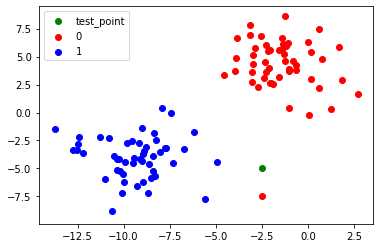

In [18]:
plt.scatter([-2.5],[-5.0],c='green',label ='test_point')
plt.scatter(x1[y1==0,0],x1[y1==0,1],c='red',label ='0')
plt.scatter(x1[y1==1,0],x1[y1==1,1],c='blue',label ='1')
plt.legend()
plt.show()

In [19]:
clf.predict(test)

array([0])

# Non Linear Dataset

In [20]:
from sklearn.datasets import make_circles

In [21]:
#to avoid the future warnings

import warnings

In [22]:
warnings.simplefilter(action ='ignore',category = FutureWarning)

In [23]:
x1,y1 = make_circles(n_samples =100,random_state =10,noise=.05)

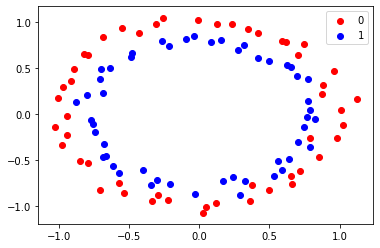

In [24]:
plt.scatter(x1[y1==0,0],x1[y1==0,1],c='red',label ='0')
plt.scatter(x1[y1==1,0],x1[y1==1,1],c='blue',label ='1')
plt.legend()
plt.show()

In [29]:
cl =SVC(kernel ='rbf',gamma =10)
clf.fit(x1,y1)
clf.score(x1,y1)

0.51

In [30]:
# when we have a large amount of sample and features then how to select the kernel value?

In [31]:
from sklearn.datasets import load_digits

In [32]:
d = load_digits()

In [33]:
x =d.data
y = d.target

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =.2,random_state =12)

In [37]:
clf = SVC(kernel ='rbf',gamma =10)

In [38]:
clf.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
clf.score(xtrain,ytrain)

1.0

In [41]:
clf.score(xtest,ytest)

0.08055555555555556

# Hyper ParaMeter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV

In [48]:
p =[{'kernel':['Linear'],'C':[.01,1,10]},{'kernel':['rbf'],'gamma':[.001,.01,.1,10]}]

In [49]:
clf =GridSearchCV(SVC(),param_grid=p,cv=5,scoring='accuracy')

In [50]:
clf.fit(xtrain,ytrain)

E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'Linear' is not in list

  FitFailedWarning)
E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'Linear' is not in list

  FitFailedWarning)
E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'Linear' is not in list

  FitFailedWarning)
E:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueErro

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.01, 1, 10], 'kernel': ['Linear']},
                         {'gamma': [0.001, 0.01, 0.1, 10], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [51]:
clf.best_score_

0.9916448896631824

In [52]:
clf.best_params_

{'gamma': 0.001, 'kernel': 'rbf'}